**Read** Data. .Examine the shape and nature of the data. It is a good practice to look at the nature of the data , its shape before we start modelling it.

In [24]:
import pandas as pd
from sklearn.datasets import load_boston
import numpy as np

df = pd.read_csv('./Boston.csv')
print('Size of boston data frame is :',df.shape)
df.head()

Size of boston data frame is : (506, 15)


Unnamed: 0     crim    zn  indus  chas  ...  tax  ptratio   black  lstat  medv
0           1  0.00632  18.0   2.31     0  ...  296     15.3  396.90   4.98  24.0
1           2  0.02731   0.0   7.07     0  ...  242     17.8  396.90   9.14  21.6
2           3  0.02729   0.0   7.07     0  ...  242     17.8  392.83   4.03  34.7
3           4  0.03237   0.0   2.18     0  ...  222     18.7  394.63   2.94  33.4
4           5  0.06905   0.0   2.18     0  ...  222     18.7  396.90   5.33  36.2

[5 rows x 15 columns]

# Data Pruning
### 1. Deal with Nan & null values
Count null values

In [25]:
df.isna().sum()

Unnamed: 0    0
crim          0
zn            0
indus         0
chas          0
nox           0
rm            0
age           0
dis           0
rad           0
tax           0
ptratio       0
black         0
lstat         0
medv          0
dtype: int64

Dropping first column as it is an index.

In [26]:
df.drop(df.columns[0], axis=1, inplace=True)
df.head()

crim    zn  indus  chas    nox  ...  tax  ptratio   black  lstat  medv
0  0.00632  18.0   2.31     0  0.538  ...  296     15.3  396.90   4.98  24.0
1  0.02731   0.0   7.07     0  0.469  ...  242     17.8  396.90   9.14  21.6
2  0.02729   0.0   7.07     0  0.469  ...  242     17.8  392.83   4.03  34.7
3  0.03237   0.0   2.18     0  0.458  ...  222     18.7  394.63   2.94  33.4
4  0.06905   0.0   2.18     0  0.458  ...  222     18.7  396.90   5.33  36.2

[5 rows x 14 columns]

No null values noted, So we need not prune anything here.

# Feature Scaling
Feature domination for eg:- Black might dominate crim from above sample.
There are few scaling methods that can scale data and reduce feature domination. 

1. Standard Scalar: scales features to 0 mean.
2. MinMax Scalar: scales to 0 to 1 range.
3. QuantileTransformer: Fits data onto a normal distribution and reduces the effects of outliers

Before, we proceed, it would be a good excercise to get some statistical analysis on features.

In [27]:
df.describe()

crim          zn       indus  ...       black       lstat        medv
count  506.000000  506.000000  506.000000  ...  506.000000  506.000000  506.000000
mean     3.613524   11.363636   11.136779  ...  356.674032   12.653063   22.532806
std      8.601545   23.322453    6.860353  ...   91.294864    7.141062    9.197104
min      0.006320    0.000000    0.460000  ...    0.320000    1.730000    5.000000
25%      0.082045    0.000000    5.190000  ...  375.377500    6.950000   17.025000
50%      0.256510    0.000000    9.690000  ...  391.440000   11.360000   21.200000
75%      3.677082   12.500000   18.100000  ...  396.225000   16.955000   25.000000
max     88.976200  100.000000   27.740000  ...  396.900000   37.970000   50.000000

[8 rows x 14 columns]

#### Inference :
It is clear from the std deviation that most of the data points are well surrounded around the mean except for zn column. Scaling techniques like MinMaxScalar might accidently include the influence of outliers. Nonetheless, we experiment with  
1. Standard Scalar
2. MinMax Transformer
2. Quantile Transformer

For simplicity, we first experiment with Standard Scalar.
Quantile fitted the data in normal distribution thus reducing the impact of outliers.
Quantile gave higher R2 on both classifiers, hence will be using that.

In [28]:
from sklearn import preprocessing

#scaler = preprocessing.StandardScaler()  # standard scaler will scale some properties of one hot encoded data as well
scaler = preprocessing.QuantileTransformer() 
scaler.fit(df)
df = pd.DataFrame(scaler.transform(df), index=df.index, columns=df.columns)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:2239: UserWarning: n_quantiles (1000) is greater than the total number of samples (506). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


### Scaled Data

In [29]:
df.iloc[0:10]

crim        zn     indus  chas  ...   ptratio     black     lstat      medv
0  0.000000  0.758416  0.069307   0.0  ...  0.144554  1.000000  0.120792  0.691089
1  0.047525  0.000000  0.397030   0.0  ...  0.319802  1.000000  0.370297  0.521782
2  0.045545  0.000000  0.397030   0.0  ...  0.319802  0.556436  0.065347  0.899010
3  0.065347  0.000000  0.053465   0.0  ...  0.473267  0.649505  0.011881  0.892079
4  0.219802  0.000000  0.053465   0.0  ...  0.473267  1.000000  0.145545  0.919802
5  0.055446  0.000000  0.053465   0.0  ...  0.473267  0.630693  0.134653  0.810891
6  0.271287  0.744554  0.420792   0.0  ...  0.128713  0.715842  0.551485  0.612871
7  0.392079  0.744554  0.420792   0.0  ...  0.128713  1.000000  0.837624  0.781188
8  0.463366  0.744554  0.420792   0.0  ...  0.128713  0.374257  0.974257  0.233663
9  0.419802  0.744554  0.420792   0.0  ...  0.128713  0.376238  0.754455  0.337624

[10 rows x 14 columns]

# Feature Selection
There are multitude of methods for feature selection.
1. Univariate feature selection (with mutual_info_regression): This selects k best features using statistical analysis such as chi squared test or mutual_info.
2. Correlation co-efficient: With this method we can find interdependencies of different features.


### 1. Univariate feature selection (with mutual_info_regression)
Selecting top 5 features, tried with 7 features but did not yield any better results.

In [30]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression
X = df.drop(labels=['medv'], axis=1)
y = df[['medv']]
selector = SelectKBest(mutual_info_regression, k=5)
selector.fit(X, y)
X_unv = selector.transform(X)
print("Top 5 columns")
print(X.columns[selector.get_support(indices=True)]) #top 5 columns
df_unv = pd.DataFrame(X_unv, columns=X.columns[selector.get_support(indices=True)])
df_unv.head()

Top 5 columns
Index(['indus', 'nox', 'rm', 'ptratio', 'lstat'], dtype='object')


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


indus       nox        rm   ptratio     lstat
0  0.069307  0.514851  0.730693  0.144554  0.120792
1  0.397030  0.296040  0.645545  0.319802  0.370297
2  0.397030  0.296040  0.907921  0.319802  0.065347
3  0.053465  0.269307  0.873267  0.473267  0.011881
4  0.053465  0.269307  0.897030  0.473267  0.145545

#### Obeservations
1. Our 5 top features are indus', 'nox', 'rm', 'ptratio', 'lstat'

### 2. Correlation coeff.

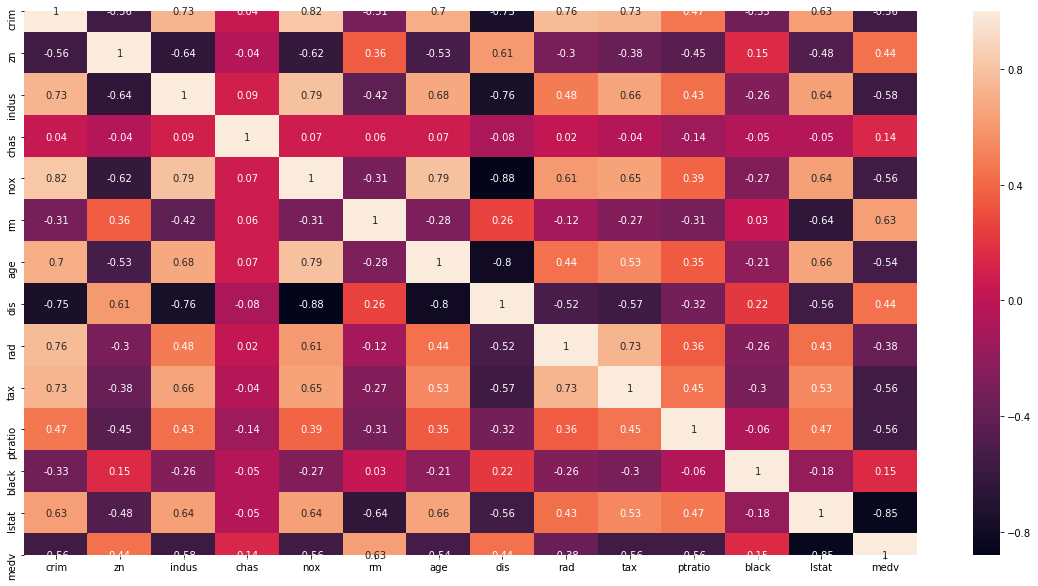

In [31]:
from matplotlib.pyplot import figure
import seaborn as sns 
boston_corr_mat = df.corr().round(2)
figure(figsize = (20,10))

sns.heatmap(data=boston_corr_mat, annot=True)

#### Observations:
From the above matrix, we can find the correlations between the features and the expected output. 

Also, we can find the correlation between any two features.If the two features are strongly correlated, we choose just one out of two for our model as they express the same thing.
1. Clearly lstat has -0.85 correlation with medv, and hence it could make a dominant feature.   
2. nox & age have highest correlations, hence we can choose any one of them.
3. nox and indus have higher correlations, so we could try dropping *one* of the these features.


In [0]:
#df.drop(labels=['indus'], axis=1)

Dropping inus column was tried and it resulted in reduction in R2 score for Logistic Regression/GradientBoostRegressor. Hence, these columns were continued to be used.

# Split into Train / Test data

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_unv,y,test_size=0.25)

## Training
1. Select models and apply hyper parameters.
2. Use cross validation (k-fold).
Here, we use k fold validation with k = 3. Leave One Out Cross Validation was tried, however it took longer time to run.
3. Use GridSearch CV
Here, we give the hyperparameters we want to vary. Grid Search CV works with all the permutations and combinations of the hyperparameters and yields the best result.
4. We also tried with polynomial features upto degree 3. These didnt add any significant improvements to the r2 score. Hence are commented out.

## Stochastic Gradient Descent Regressor: SGD Regression
### Train
Stochastic Gradient Descent Regressor
About Hyper-Parameters
1. Trying both l1 & l2 regularization penalty
2. Other hyper parameters include alpha, learning rate, tolerance and max iterations


I tried various combinations to understand how the model works when we change different parameters.

In [34]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree = 3)
#X_train_reg_poly = poly_reg.fit_transform(X_train)
#X_test_reg_poly = poly_reg.fit_transform(X_test)

# try without polynomial features
X_train_reg_poly = X_train
X_test_reg_poly = X_test
## Hyper parameters

hyperparameters = dict(
    loss=['squared_loss', 'huber'],
    penalty=['l1', 'l2'],
    alpha=[0.1, 0.001, 0.0001, 0.00001],  # Regularization parameter
    learning_rate=['invscaling','optimal','adaptive'], 
    tol=[0.00001, 0.0000001 ],
    max_iter=[1000, 1000000])                   

#hyperparameters=dict()           # dry run

clf = GridSearchCV(SGDRegressor(), hyperparameters, cv=3, verbose=0)
best_model = clf.fit(X_train_reg_poly, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

#### Train and print best model

In [35]:
#best_model = clf.fit(X_train, y_train)
print("Best parameters set found on development set:")
print()
print(best_model.best_params_)

Best parameters set found on development set:

{'alpha': 0.001, 'learning_rate': 'optimal', 'loss': 'huber', 'max_iter': 1000, 'penalty': 'l1', 'tol': 1e-07}


### Test & F1 score, Accuracy

In [36]:
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

y_pred = best_model.predict(X_test_reg_poly)
mse_lrm=mean_squared_error(y_test, y_pred)
r2_lrm=r2_score(y_test, y_pred)

print('Report :\n')
print('R2', r2_lrm)
print('MSE', mse_lrm)

Report :

R2 0.7086803046321881
MSE 0.022411130822380505


## Gradient Boosted Decision Trees (Regressor)
### Train
About Hyper-Parameters:
Hyper parameters include loss, alpha, tolerance, max depth, min impurity split.
Other hyper parameters include loss, alpha, max depth, tolerance and min_impurity_split. 
min_impurity_split: Arrests the growth of the tree particularly if a certain threshold is crossed by the node.


I tried various combinations to understand how the model works when we change different parameters.

In [37]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree = 3)
#X_train_reg_poly = poly_reg.fit_transform(X_train)
#X_test_reg_poly = poly_reg.fit_transform(X_test)

# try without polynomial features
X_train_reg_poly = X_train
X_test_reg_poly = X_test

## Hyper parameters

hyperparameters = dict(
    loss=['ls', 'lad'],
    alpha=[0.001, 0.0001, 0.00001],  # Regularization parameter
    tol=[0.0001],
    max_depth=[3,5,7],
    min_impurity_split=[0.00001,0.0000001, 0.000000001])                   

#hyperparameters=dict()           # dry run

clf = GridSearchCV(GradientBoostingRegressor(), hyperparameters, cv=3, verbose=1)
best_model = clf.fit(X_train_reg_poly, y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/tree

### Train and print best model

In [38]:

print("Best parameters set found on development set:")
print()
print(best_model.best_params_)

Best parameters set found on development set:

{'alpha': 0.001, 'loss': 'ls', 'max_depth': 3, 'min_impurity_split': 1e-07, 'tol': 0.0001}


### Test & F1 score, Accuracy

In [39]:
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

y_pred = best_model.predict(X_test_reg_poly)
mse_lrm=mean_squared_error(y_test, y_pred)
r2_lrm=r2_score(y_test, y_pred)

print('Report :\n')
print('R2', r2_lrm)
print('MSE', mse_lrm)

Report :

R2 0.7899875224607553
MSE 0.016156192606620087


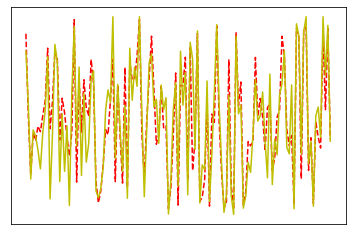

In [40]:
# Plot of Y_test versus Y_pred

import matplotlib.pyplot as plt
x_axis = np.array(range(0, y_pred.shape[0]))
plt.plot(x_axis, y_pred, linestyle="--", color='r', label="Y_pred")     # regression line
plt.plot(x_axis, y_test, color='y', label="Y_test")  
plt.xticks(())
plt.yticks(())
plt.show()

## Conclusion:
**Thus GradientBoostingRegressor gives higher R2.** The graph shows that predictions closely follow the actual test data. Hence , we can conclude that the model works well. 
We tried different combinations of feature selection and feature scaling techniques. Quantile transformer resulted in the best R2 scores. Mean squared error was most of the times comparable accross different scaling techniques. Hence, R2 was used as determining measure. Original baseline for SGDRegressor was R2 = 0.65 and MSE = 0.05 whic has been improved to R2 = 0.81 and MSE = 0.015. Also, polynomial features were used instead of linear features, which didnot improve upon the accuracy significantly.